In [94]:
import math
import numpy as np
import matplotlib.pyplot as pl
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [95]:
X = pd.read_csv('data/train.csv')
y = np.array(X['label'])[:1000]
X = np.array(X.drop(columns = ['label']))[:1000]

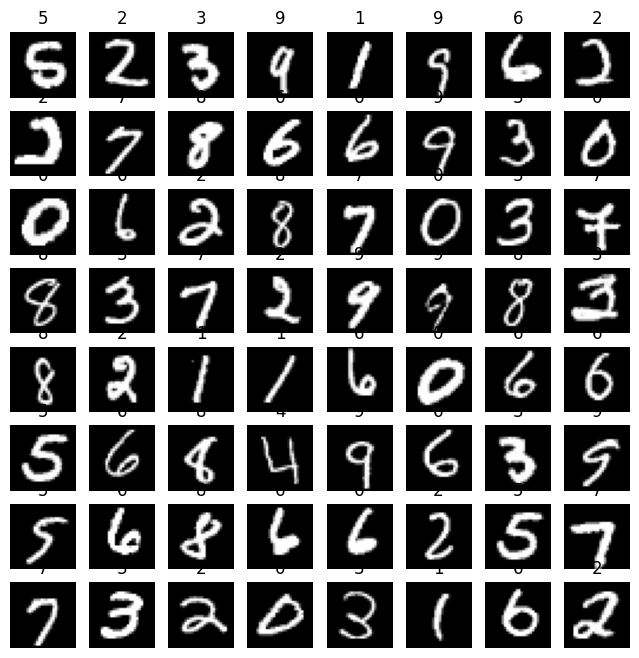

In [96]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        ax[i][j].set_title(y[r])
        ax[i][j].imshow(X[r].reshape(28,28),cmap = 'gray')
        ax[i][j].set_axis_off()

In [97]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units = 100,activation = 'relu'),
        Dense(units = 25,activation = 'relu'),
        Dense(units = 50,activation = 'relu'),
        Dense(units = 10,activation = 'linear'),
    ],name = "my_model"
)


In [98]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               78500     
                                                                 
 dense_29 (Dense)            (None, 25)                2525      
                                                                 
 dense_30 (Dense)            (None, 50)                1300      
                                                                 
 dense_31 (Dense)            (None, 10)                510       
                                                                 
Total params: 82,835
Trainable params: 82,835
Non-trainable params: 0
_________________________________________________________________


In [99]:
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])


(784, 100)
<tf.Variable 'dense_28/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[ 0.04626656, -0.00512203, -0.04319731, ..., -0.05053189,
         0.03335495,  0.00879254],
       [ 0.00541347,  0.04586491,  0.04729334, ...,  0.01476135,
        -0.06594432,  0.02144236],
       [ 0.0499552 , -0.05594284,  0.02745471, ...,  0.04748534,
        -0.04815501, -0.04390333],
       ...,
       [ 0.0698792 , -0.06249245, -0.07738222, ...,  0.05337125,
        -0.03558557, -0.01803169],
       [ 0.04661994,  0.02987108,  0.01631677, ...,  0.01659396,
         0.05420135,  0.03904476],
       [ 0.04742466,  0.0503547 ,  0.00777747, ...,  0.07834716,
         0.01086213,  0.050275  ]], dtype=float32)>


In [100]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 22.8869
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 2.2192
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 2.0061
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 1.8781
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 1.7638
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 1.6382
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 1.5413
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 1.4253
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 1.2906
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 1.2535
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 1.1642
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 1.1267
Epoch 13/20
32/32 [=============================

In [101]:
X
# print(X[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [102]:
def pre(in_):
    return np.argmax(tf.nn.softmax(model.predict(in_.reshape(1,784))).numpy()[0])

In [103]:
X_test = pd.read_csv('data/test.csv')
X_test = np.array(X)[:1000]

1/1 [==============================] - 0s 13ms/step


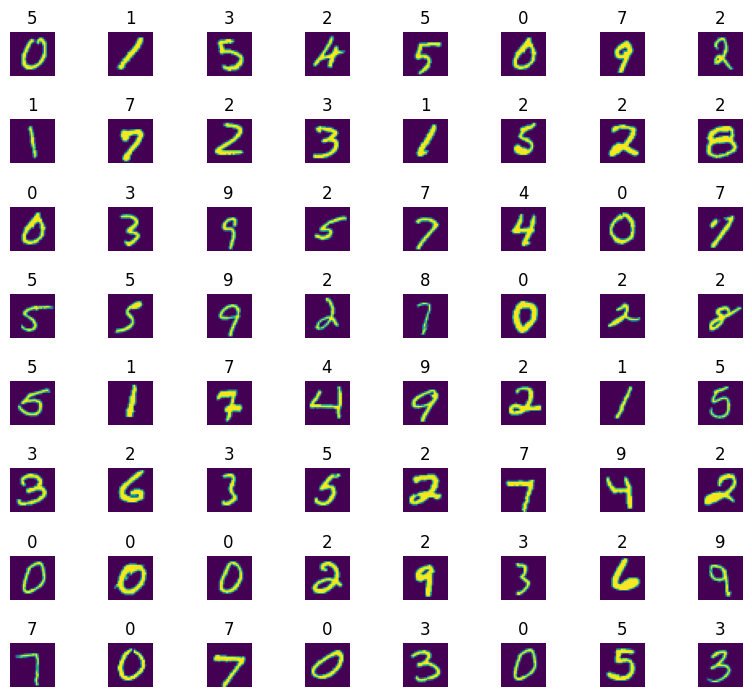

In [104]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,999)
        ax[i][j].set_title((pre(X_test[r])))
        ax[i][j].imshow(X_test[r].reshape(28,28))
        ax[i][j].set_axis_off()
        

In [117]:

tf.keras.losses.SparseCategoricalCrossentropy().call(y,model.predict(X))

32/32 [==============================] - 0s 710us/step


<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 1.3862945 ,  2.1972246 ,  1.9459101 ,  1.3862945 ,  2.1972246 ,
        2.1102781 ,  1.3862945 ,  1.7917595 ,  1.4616412 ,  1.7749631 ,
        1.6018705 ,  1.1011785 ,  1.7917595 ,  1.7917595 ,  1.7917595 ,
        1.7925524 ,  0.84300774,  2.1764143 ,  1.3862945 , 16.961103  ,
        1.6018705 ,  1.1249847 ,  0.84300774,  2.1972246 ,  0.84300774,
        1.5333904 ,  1.1249847 ,  1.0986127 ,  1.2046701 ,  1.6094381 ,
        1.6018705 ,  1.2342173 ,  1.3862945 ,  1.7917595 ,  1.0088891 ,
        1.9459101 ,  1.7917595 ,  1.3774334 ,  1.3862945 ,  1.3862945 ,
        2.8450017 ,  1.9459101 ,  1.3862945 , 16.961103  ,  0.84300774,
        1.1249847 ,  1.7917595 ,  1.3862945 ,  1.3862945 ,  1.3862945 ,
        1.3862945 ,  1.4357107 ,  1.9459101 ,  1.7917595 ,  2.1972246 ,
        1.0986127 ,  0.84300774,  1.7917595 ,  1.2202215 ,  1.3862945 ,
        1.9459101 ,  1.3862945 ,  1.9839082 ,  2.1972246 ,  1.1249847 ,
        1.79175